# **Data Visualization**
---

## Objectives

* Answer business requirement 1: 
    * The client is interested in visually differentiating animal species using image data.


## Inputs

* inputs/datasets/animals/image/train/
* inputs/datasets/animals/image/test/
* inputs/datasets/animals/image/validation/

## Outputs

* Image shape embeddings pickle file.
* Plots showing mean and variability of images per species.
* Plots highlighting differences between average species images.
* Code to generate an image montage, which can later be reused in the Streamlit dashboard.


## Additional Comments | Insights | Conclusions

N/A for now

---

## Set Data Directory
---

Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

Set working directory

In [3]:
cwd = os.getcwd()
os.chdir('/workspaces/Animal_detection_camera')
print("You set a new current directory")

work_dir = os.getcwd()
work_dir

You set a new current directory


'/workspaces/Animal_detection_camera'

### Set input directories
* Set train, test, and validation paths.

In [4]:
my_data_dir = 'inputs/datasets/animals/image'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available, create a new version.')
    pass
else:
    os.makedirs(name=file_path)


### Set Species labels

In [6]:
labels = os.listdir(train_path)
print('Labels for the images are:', labels)

Labels for the images are: ['lemur', 'snake', 'elephant', 'frog', 'chimpanzee', 'chinchilla', 'flamingo', 'mongoose', 'ostrich', 'ferret', 'camel', 'bee', 'mole', 'penguin', 'leopard', 'hawk', 'hedgehog', 'walrus', 'falcon', 'grasshopper', 'beaver', 'antelope', 'giraffe', 'duck', 'lizard', 'crab', 'goose', 'gorilla', 'jaguar', 'sheep', 'lynx', 'butterfly', 'panda', 'goat', 'deer', 'peacock', 'dog', 'whale', 'kangaroo', 'seal', 'cheetah', 'cow', 'iguana', 'hippopotamus', 'fox', 'cat', 'donkey', 'raccoon', 'blackbird', 'buffalo', 'koala', 'crocodile', 'dolphin', 'hyena', 'porcupine', 'bear', 'squid', 'spider', 'eagle', 'bison', 'owl', 'otter', 'snail', 'wolf']


---

# Data Visualization of Image Data
---

## Image shape

Compute average images images size on train set.

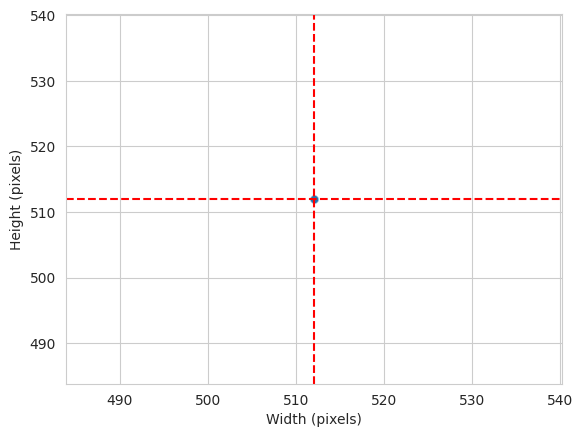

Width average: 512 
Height average: 512


In [7]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Set standard image shape as originals are too large

In [9]:
image_shape = (128, 128, 3)
print("Image shape set to:", image_shape)

Image shape set to: (128, 128, 3)


Save image shape

In [10]:
joblib.dump(value=image_shape,
    filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']